# Housing Days On Market Exploratory Analysis and Visualization

## Information
Using the output file of Data Preparation for analysis and modeling notebook ‘df_data_inspection_cleaning_output.csv’ which has 13,725 instances and 107features, this note book does exploratory analysis and visualization. 

We have substantially reduced our features to 44 which are of interest to our analysis and performed some computation analysis using summary statistics and histograms. 

Contrary to our initial hypothesis, the correlation matrix and correlation heat map showed that all of the features included in the analysis have no relationship with days on market. However, we noticed high correlation of some of our features with list price, close date month year and median home value per square feet.
owever, we noticed high correlation of some of our features with list price, close date month year and median home value per square feet. 


### Environment Information:

Python: 2.7

#### Contributed by: Sabel Kassa

## Python Package(s) Used

In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import time
from scipy import stats

In [2]:
import matplotlib.pyplot as plt
from pandas.tools.plotting import parallel_coordinates, radviz, lag_plot, bootstrap_plot
from scipy.stats import probplot, skew, skewtest, kurtosis, kurtosistest, ppcc_plot, ppcc_max
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls




%matplotlib inline
plt.style.use('seaborn-whitegrid')

from bokeh.charts import BoxPlot, output_file, show
from bokeh.charts import Histogram, output_file, show
from bokeh.plotting import figure
from bokeh.layouts import row
from bokeh.io import push_notebook,show , output_notebook
from bokeh.sampledata.autompg import autompg as df
from bokeh.charts import defaults, vplot, hplot, show, output_file
from bokeh.charts import TimeSeries, output_file, show

### Fetching data

Fetching data set from DOM-(Data preparation for analysis and modeling)notebook.

In [3]:
# Import data csv into dataframe
df_4 = pd.read_csv('df_4.csv')

df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21687 entries, 0 to 21686
Data columns (total 79 columns):
Unnamed: 0                                    21687 non-null int64
ListDate                                      21687 non-null object
CloseDate                                     21687 non-null object
ListPrice2                                    21687 non-null int64
ClosePrice2                                   21687 non-null int64
Bedrooms                                      21687 non-null int64
BathsFull                                     21687 non-null int64
BathsHalf                                     21687 non-null float64
Levels                                        21687 non-null int64
Fireplaces                                    21687 non-null int64
BasementY/N                                   21687 non-null int64
Acres                                         21687 non-null float64
YearBuilt                                     21687 non-null int64
DOMP          

## Reducing features for analysis  

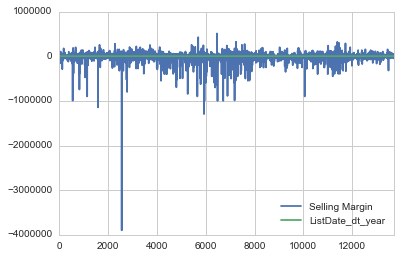

In [10]:
#Created list date month year and close date month year features 
from datetime import datetime
import calendar


df_4['Selling Margin']=df_4['ClosePrice2']-df_4['ListPrice2']
df_4['ListDate_MonthYear']=(100*df_4['ListDate_dt_year']+df_4['ListDate_dt_month'])
df_4['ListDate_MonthYear'].dtype
Columns =['Selling Margin','ListDate_dt_year']
df_6 =df_4[Columns]
df_6.set_index('ListDate_dt_year')

#df_6=df_6.cumsum()
plt.figure();df_6.plot();plt.legend(loc='best')

#df_4['CloseDate_MonthYear']=(100*df_4['CloseDate_dt_year']+df_4['CloseDate_dt_month'])


In [ ]:
df_4 = df_4.drop('Unnamed: 0', axis = 1)


In [ ]:
df_4.columns

In [ ]:
#Reduced features for analysis and modeling 

Column_list =[
'ListPrice2',
'ClosePrice2',
'Bedrooms',
'BathsFull',
'BathsHalf',
'BasementY/N',
'DOMP',
'TaxTotalLivingArea',
'Zip',
'SaleCount',
'MedianValuePerSqft',
'PctOfHomesDecreasingInValues',
'PctOfHomesIncreasingInValues',
'Turnover',
'PriceIndex',
'FreddieMac15yr',
'FreddieMac5yrARM',
'mimi',
'mimiStatus',
'PropertyCrimes',
'ViolentCrimes',
'Pct16andOverEmployed_2010_14',
'AvgFamilyIncAdj_2010_14',
'PctFamiliesOwnChildrenFH_2010_14',
'PctUnemployed_2010_14',
'PctVacantHsgUnitsForRent_2010_14',
'MS_SDStarRating',
'HS_SDStarRating',
'ES_SDStarRating',
'count_grocery_km',
'count_metro_bus_km',
'count_metro_station_km',
'count_public_school_elem_km',
'count_public_school_high_km',
'count_public_school_mid_km',
'distance_grocery_km',
'distance_metro_bus_km',
'distance_metro_station_km',
'distance_public_school_elem_km',
'distance_public_school_high_km',
'distance_public_school_mid_km',
'CloseDate_dt_year',
'CloseDate_dt_month',
'ListDate_dt_year',
'ListDate_dt_month']

df_5=df_4[Column_list]
df_5.info()

## Exploratory analysis 

### Summary Statistics of compiled dataset

From the summary statistics below, we can observe high competitive housing market with value of properties in DC is roughly ranges from $300,000 to a maximum of $788,000 with median begin around $600,000. The margin between list price and close price is significantly low showing a very competitive real estate market. In addition, the days on market is also very low with an average of 46 days to 75%of the houses being sold in about 56 days. 

The area of living is relatively small with about 50% of the properties occupying less than 1000 square feet. Public school ranking is also relatively very low with about 50% of the properties being assigned to public schools with ranking of 3 and 2 based on school digger ranking of less than 70% in school rank. 

Majority of the properties in DC have increased in value and the average income of more than 50% families is above 145,000. The percentage of vacant housing units in the market for rent is also relatively very low depicting a robust market and relatively stable demographics. 


In [ ]:
# Summary Statistics 
Summry_Statistics=pd.DataFrame(df_5.describe())
Summry_Statistics
#Summry_Statistics.to_csv('Summary_Stat2.csv')

### Analyzing Distribution of Features

In [ ]:
#Plotting distribution certain features using Bokeh. 
defaults.width = 450
defaults.height = 350

DOMP_Hist= Histogram(df_5, values= 'DOMP',color ='navy', title="Days on Market Distribution")
ListPrice_Hist=Histogram(df_5,values='ListPrice2',color='red',title="List Price Distribution")
ClosePrice_Hist=Histogram(df_5,values='ClosePrice2',color='indigo',title="Close Price Distribution")
Medval_Hist=Histogram(df_5,values='MedianValuePerSqft',color='green',title="Median Value per Square feet Distribution")
HomeDecr_Hist=Histogram(df_5,values='PctOfHomesDecreasingInValues',color='turquoise',title="%Properties decreasing in value Distribution")
HomeIncr_Hist=Histogram(df_5,values='PctOfHomesIncreasingInValues',color='orange',title='%Properties increasing in value Distribution')
FamilyInc_Hist=Histogram(df_5,values='AvgFamilyIncAdj_2010_14',color='fuchsia',title="Average family income distribution")

output_notebook()

d= hplot(DOMP_Hist)
p = hplot(ListPrice_Hist,ClosePrice_Hist)
m= hplot(HomeDecr_Hist,HomeIncr_Hist)
v=hplot(Medval_Hist,FamilyInc_Hist)

show(vplot(d,p,m,v))



From the above distribution, we can see that there is high activity around the end of the year followed by the beginning of the year and around summer. 

In [ ]:
#Histogram of remaining features 

Column_list =[
'Bedrooms',
'BathsFull',
'BathsHalf',
'Turnover',
'PriceIndex',
'FreddieMac15yr',
'FreddieMac5yrARM',
'mimi',
'PropertyCrimes',
'ViolentCrimes',
'Pct16andOverEmployed_2010_14',
'AvgFamilyIncAdj_2010_14',
'PctFamiliesOwnChildrenFH_2010_14',
'PctUnemployed_2010_14',
'PctVacantHsgUnitsForRent_2010_14',
'MS_SDStarRating',
'HS_SDStarRating',
'ES_SDStarRating',
'CloseDate_dt_year',
'CloseDate_dt_month',
'ListDate_dt_month']
df_5a=df_4[Column_list]
df_5a.hist(figsize=(25,25))



## Correlation of all features 

In [ ]:
#Correlation Matrix 
df_5_CorrelationMatrix = pd.DataFrame(df_5.corr())
df_5_CorrelationMatrix
#df_5_CorrelationMatrix.to_csv('Correlation_Matrix.csv')

In [ ]:
#Create Correlation Matrix plot 

# Generate a mask for the upper triangle
mask = np.zeros_like(df_5_CorrelationMatrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_5_CorrelationMatrix, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

Surprisingly, the correlation matrix shows that days on market in DC area doesn’t have any correlation with any of the features used in our analysis. This is quite contrary to our initial hypothesis and the perception of the majority in real estate market. 

However, we have observed some interesting relationship among other features in our analysis. We can see some correlation between values of property and no of bed room and bathroom as well as average family adjusted income. Median value per square feet is highly correlated with percentage of employed population, income, Zillow home value index and no ofPercentage change in home value is also related with price index and proportion of current mortgage payments in each market, and the local employment picture (mimi) and Freddie Mac's DC house price index (PriceIndex) as well as the dates the property was put on market.

The data also shows high correlation between property and violent crimes and public school ranking, which shows the impact of low ranking school in neighborhood peace. There is also a negative relationship between violent crime and Zillow's median estimated home value (Zhvi) which depicts the impact of crime on neighborhood property value. 

There is high correlation between the average family income and the Zillow home value index as well as median value per square feet. And a high negative relationship between family income and public school ranking. 
We have can also see that areas with properties having many children have high crime rate and unemployed but on the contrary they are located in areas where public school ranking is higher. 

There is some correlation between proximity of properties to grocery store and median value per square feet of properties and turnover - percentage of all homes in the home's zip area that sold in the past 12 months from the closing date as well as employment. 
We can also see some positive correlation between accessibility of metro bus and metro stations and property crimes reported in DC. And a negative correlation between median value per square feet of properties and proximity to grocery stores.  Value of property in DC is not related to the proximity of grocery stores. And the Value of property in DC is has low correlation with the proximity to metro stations and schools

The date the property is listed on market is highly correlated with Mimi- (proportion of current mortgage payments in each market, and the local employment picture), Price Index (Freddie Mac's DC house price index) and percentage of homes increasing in value. 


In [ ]:
# Correlation heatmap
f, ax = plt.subplots(figsize=(25,20))
heat_map = sns.heatmap(df_4.corr(),vmax =0.8,square=True)
fig = heat_map.get_figure()
fig.savefig('correlation_heatmap_plot')
fig.show()
fig.savefig("Correlation_Heatmap.png")


## Analysis of DC Realestate Market 

In [ ]:
df_4['Selling Margin']=df_4['ClosePrice2']-df_4['ListPrice2']
df_4['ListDate_dt_year']
df_4['ListDate_dt_month']
#import plotly 
#plotly.tools.set_credentials_file(username='sabel1979', api_key='PIj8VFCq7hY6s2MXKR2b')
x = df_4['ListDate_dt_year']
y = df_4['Selling Margin']

plt.plot(x,y)
plt.tight_layout()

fig = plt.gcf()
plotly_fig = tls.mpl_to_plotly( fig )

plotly_url = py.plot(plotly_fig, filename='Annual Selling Margin')

# Analysis of DC properties by Zip Code

Since we didn't see any relationship between our target variable- days on market and all of the other feautures, we will be further breaking down our properites and features by zipcode. 

In [ ]:
df_5['DOMP'].hist(by=df_5['Zip'],figsize=(25,25))

In [ ]:
#Values per zipcode 
groupby_Zip=df_5.groupby(df_5['Zip'])
Zip_Summary_Stat=groupby_Zip.describe()
#df.groupby(df_5['Zip']).to_csv('Zip_Summary.csv')
#Zip_Summary_Stat.to_csv('Zip_summary_stat.csv')
Zip_Summary_Stat



## Correlation of features per zipcode 

In [ ]:
df_5a_Correlation= df_5.groupby('Zip').corr()
df_5a_Correlation.to_csv('Correlation_Matrix_by_Zipcode.csv')

In [ ]:

## Pairplot on selected featureses
#pair_plot = sns.pairplot(df_5a)
#fig = pair_plot.get_figure()
#fig.savefig('pair_plot')
#fig.show

### Average values of features per zipcode 

In [ ]:
# Average value per zip code
df_Avg_zip=pd.DataFrame()
df_Avg_zip['Avg_DOMP']=(df_5.groupby(['Zip'])['DOMP'].mean())
df_Avg_zip['Avg_ListPrice']=(df_5.groupby(['Zip'])['ListPrice2'].mean())
df_Avg_zip['Avg_ClosePrice']=(df_5.groupby(['Zip'])['ClosePrice2'].mean())

df_Avg_zip['Avg_pctofhomedecreastingvalues']=(df_5.groupby(['Zip'])['PctOfHomesDecreasingInValues'].mean())
df_Avg_zip['Avg_pctofhomeincreasingvalues']=(df_5.groupby(['Zip'])['PctOfHomesIncreasingInValues'].mean())
df_Avg_zip['Avg_PropertyCrimes ']=(df_5.groupby(['Zip'])['PropertyCrimes'].mean())
df_Avg_zip['Avg_ViolentCrimes ']=(df_5.groupby(['Zip'])['ViolentCrimes'].mean())

df_Avg_zip.hist(figsize=(25,25))



In [ ]:
df_Avg_zip

In [ ]:
#Correlation of Average values per zipcode
df_Avg_Zip_CorrelationMatrix = pd.DataFrame(df_Avg_zip.corr())
df_Avg_Zip_CorrelationMatrix
#df_Avg_Zip_CorrelationMatrix.to_csv('Avg_Zip_Correlation_Matrix.csv')

In [ ]:
#Create Correlation Matrix plot 

# Generate a mask for the upper triangle
mask = np.zeros_like(df_Avg_Zip_CorrelationMatrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_Avg_Zip_CorrelationMatrix, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)


## Trend Analysis 

### Average values of features by list date month year

In [ ]:
#List month and year analysis 

df_listdate=pd.DataFrame()
df_listdate['Avg_pctofhomedecreastingvalues']=(df_5.groupby(['ListDate_MonthYear'])['PctOfHomesDecreasingInValues'].mean())
df_listdate['Avg_pctofhomeincreasingvalues']=(df_5.groupby(['ListDate_MonthYear'])['PctOfHomesIncreasingInValues'].mean())
df_listdate['Avg_ListPrice']=(df_5.groupby(['ListDate_MonthYear'])['ListPrice2'].mean())
df_listdate['Avg_ClosePrice']=(df_5.groupby(['ListDate_MonthYear'])['ClosePrice2'].mean())
df_listdate['Avg_DOMP']=(df_5.groupby(['ListDate_MonthYear'])['DOMP'].mean())
df_listdate['Turnover']=(df_5.groupby(['ListDate_MonthYear'])['Turnover'].mean()
df_listdate['Turnover']=(df_5.groupby(['ListDate_MonthYear'])[''].mean()                         
df_listdate


In [ ]:
# Analysis of some features 
df_4a=df_4[[

'ListPrice2',
'ClosePrice2',
'Acres',
'YearBuilt',
'DOMP',
'TaxTotalLivingArea',
'SaleCount',
'MedianValuePerSqft',
'Zhvi',
'PriceIndex',
'FreddieMac15yr',
'FreddieMac5yrARM',
'mimi',
'PropertyCrimes',
'ViolentCrimes']]

In [ ]:
#Plotting DOMP over list date 
import plotly.plotly as py
import plotly.graph_objs as go

x = dt(year=df_4['ListDate_dt_year'], month= df_4['ListDate_dt_month']
,day= df_4['ListDate_dt_day'])
y=df_4['DOMP']
data = [go.Scatter(x=x,y=df_4['DOMP'])]
py.iplot(data)



In [ ]:
# Timeseries plottin of DOMP on Listdate.
dates = pd.date_range('2009-12', '2015-01', freq='M')


x = np.array(dt.datetime(df_4['CloseDate_dt_year']))
y = (df_4['DOMP'])

plt.plot(x,y)
plt.show()

In [ ]:
#Box plot of DOMP per zip code

g = sns.FacetGrid(df_4, col='Zip', size=20, aspect=.2)
g = g.map(sns.boxplot, 'DOMP', 'ClosePrice2')
sns.plt.show()

### Analysis/Modelling continued in Modelling script